In [39]:
from torchvision import datasets
import numpy as np
from matplotlib import pyplot as plt

(28, 28)


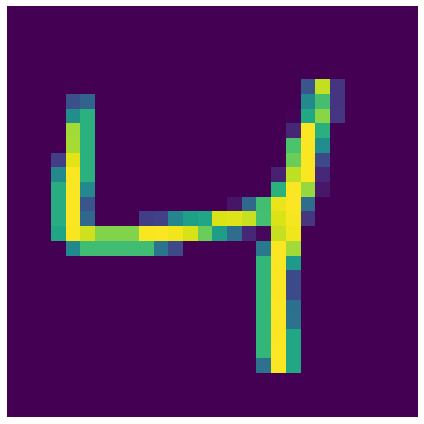

In [40]:
mnist = datasets.MNIST('data', train=True, download=True)

fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(6, 8))

image_pil = mnist[2][0]
image_np = np.asarray(mnist[2][0]) # To undo: im = PIL.Image.fromarray(numpy.uint8(I))

ax.imshow(image_np)
ax.axis('off')
plt.tight_layout()

print(image_np.shape)

In [41]:
def weights(img):
    channel = 1
    n_row, n_col = img.shape
    
    N = n_row*n_col
    W = np.zeros((N,N))
    
    r = 2
    sigma_I = 0.1
    sigma_X = 1.0
    
    for row_count, row in enumerate(img):
        for col_count, v in enumerate(row):
            index = row_count * n_col + col_count

            search_w = r * 2 + 1
            start_row = row_count - r
            start_col = col_count - r

            for d_row in range(search_w):
                for d_col in range(search_w):
                    new_row = start_row + d_row
                    new_col = start_col + d_col
                    dst = (new_row - row_count) ** 2 + (new_col - col_count) ** 2
                    if 0 <= new_col < n_col and 0 <= new_row < n_row:
                        if dst >= r ** 2:
                            continue

                        cur_index = int(new_row * n_col + new_col)

                        F = img[row_count, col_count] - img[new_row, new_col]
                        if channel == 3:
                            F_diff = F[0]**2 + F[1]**2 + F[2]**2  
                        else:
                            F_diff = F**2

                        w = np.exp(-((F_diff / (sigma_I ** 2)) + (dst / (sigma_X ** 2))))
                        W[index, cur_index] = w

    return W

/tmp/ipykernel_3894/1491859094.py:31: RuntimeWarning: overflow encountered in ubyte_scalars
  F = img[row_count, col_count] - img[new_row, new_col]


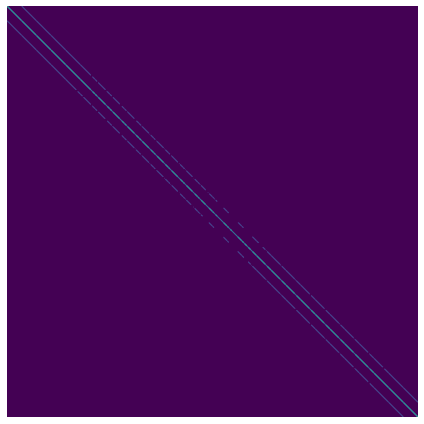

In [46]:
W = weights(image_np)

fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(6, 8))
ax.imshow(W)
ax.axis('off')
plt.tight_layout()

L      - min -0.36787944117144233, max 2.0128588976322206, avg 3.9213709562116286e-19
L_symm - min -0.26894142136999516, max 0.6680893350877163, avg 1.2850714669884606e-06


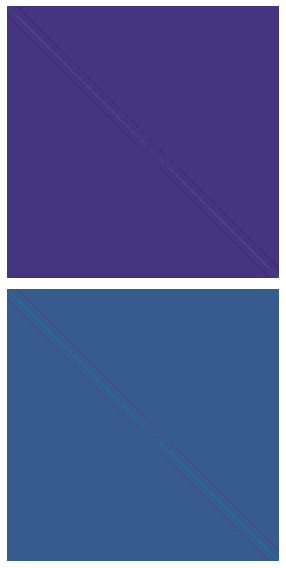

In [48]:
d = np.sum(W, axis=0)
D = np.diagflat(d)

d_sqrt_inv = np.power(np.sqrt(d),-1)
D_sqrt_inv = np.diagflat(d_sqrt_inv)

L = D-W
L_symm = D_sqrt_inv @ (D-W) @ D_sqrt_inv

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))
ax[0].imshow(L)
ax[1].imshow(L_symm)
for a in ax:
    a.axis('off')
plt.tight_layout()

print(f'L      - min {np.min(L)}, max {np.max(L)}, avg {np.average(L)}')
print(f'L_symm - min {np.min(L_symm)}, max {np.max(L_symm)}, avg {np.average(L_symm)}')

In [61]:
from scipy.sparse import linalg

# import sys
# sys.path.append("../")
# from nc import NormalizedCuts

# Node = NormalizedCuts(symm_norm_L=True)

# turns despite requesting the correct order it is wrong :)


# TODO: in general
# Lsymm vs L
# eigs, eigh and a few others probably... also sigma for eigs?
# TODO: for this part
# y = D_inv_sqrt * z
# index = np.argsort(lam)
# smallest = y[:, index[1]] # Does this line make any sense at all??? Or is it wrong..


# Current learnings:
# the order is different every time, despite an option which is 'which' = Smallest real.. (more the method used and not the actual thing..)

lam_l, z_l = linalg.eigs(L, which='SR')
index_l = np.argsort(lam_l)
print(lam_l.real)
print(index_l)

print('\n')

lam_lsymm, z_lsymm = linalg.eigs(L_symm, which='SR')
index_lsymm = np.argsort(lam_lsymm)
print(lam_lsymm.real)
print(index_lsymm)

[1.68928985e-03 1.80574992e-16 6.22908829e-17 4.61653255e-17
 7.49692694e-16 2.83049079e-16]
[3 2 1 5 4 0]


[ 2.65467448e-16  1.89665203e-16  6.44723389e-17 -4.04902216e-17
 -1.17079508e-16  3.37907563e-17]
[4 3 5 2 1 0]
